# Vehicle Number Plate Analysis with EasyOCR

This notebook demonstrates how to analyze and extract information from vehicle number plate images using the <b>EasyOCR</b> library.

To get started, you must have the following requirements installed:

1. `opencv-python` - the official Python implementation of the OpenCV library
2. `easyocr` - to extract information from number plates
3. `numpy` - for loading images as arrays
4. `matplotlib` - for displaying results graphically
5. `notebook` - to run this notebook in a Jupyter server

It is recommended to have a virtual environment to isolate these requirements from the rest of your system. This can be done using Python's `virtualenv` package.

First, open a <b>Terminal</b> (<b>Command Prompt</b> on Windows) in the same folder as this notebook and create a virtual environment:

```shell
python3 -m venv env
```

Next, activate the virtual environment. For Windows users:

```shell
.\env\Scripts\activate
```

For Linux and MacOS users:

```shell
source env/bin/activate
```

Now you can safely install the above requirements in your virtual environment:

```shell
pip install opencv-python easyocr numpy matplotlib notebook
```

After installation is complete, launch the Jupyter server to edit this notebook:

```shell
jupyter notebook
```

## Getting Started

The following imports are necessary to work with this notebook.

In [17]:
# imports

import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

We will be working with the following image first.

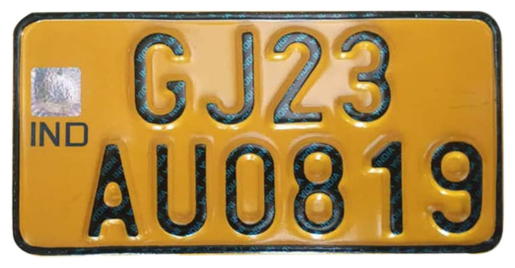

In [18]:
# load number plate image from disk
img = mpimg.imread("numplate.jpg")

# display loaded image
%matplotlib inline
plt.imshow(img)
plt.axis("off")
plt.show()

### 1. Image Preprocessing

We start by defining a function to perform preprocessing on the image containing the number plate.

This function includes the following steps:
1. Converting the color image to <b>grayscale</b>
2. Applying a <b>Gaussian blur</b> filter to the grayscale image

In [19]:
# function to preprocess the image

def preprocess_img(img_path):
    # load the image from the disk
    img = cv2.imread(img_path)

    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply Gaussian blur to reduce noise and improve OCR accuracy
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return blurred

Here, a kernel size of `(5, 5)` has been used for the Gaussian blur.

### 2. Optical Character Recognition (OCR) in Number Plate Image

Next, we define a function to perform OCR on the preprocessed image.

In [20]:
# function to extract and return text from preprocessed image

def perform_ocr(img, reader):
    # perform OCR on the preprocessed image
    result = reader.readtext(img)

    # extract and return the recognized text
    recognized_text = ' '.join([entry[1] for entry in result])
    return recognized_text

### 3. Display Results

Finally, we define a function to display the results obtained after OCR along with the input image.

In [21]:
# function to display input image and recognized text

def display_image_with_results(img, text):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Recognized Text: {text}")
    plt.axis("off")
    plt.show()

## Final Result

Now, we can define a function to perform the steps outlined in the above functions in a single operation.

In [22]:
# function for full OCR operation

def number_plate_recognition(img_path):
    # preprocess the image
    preprocessed_img = preprocess_img(img_path)

    # create an OCR reader using the 'en' language (for English text)
    reader = easyocr.Reader(['en'])

    # perform OCR on the preprocessed image
    recognized_text = perform_ocr(preprocessed_img, reader)

    # display the results
    display_image_with_results(cv2.imread(img_path), recognized_text)

Testing this function for the above image, we get the following output:

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


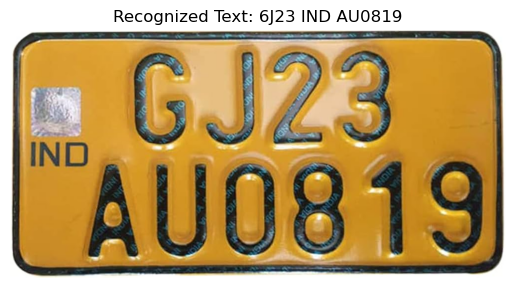

In [25]:
# example usage (with number plate only)
number_plate_recognition("numplate.jpg")

As evident above, this approach works somewhat effectively when we have a clear picture of the number plate. However, in practical scenarios, this effectiveness may not be guaranteed.

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


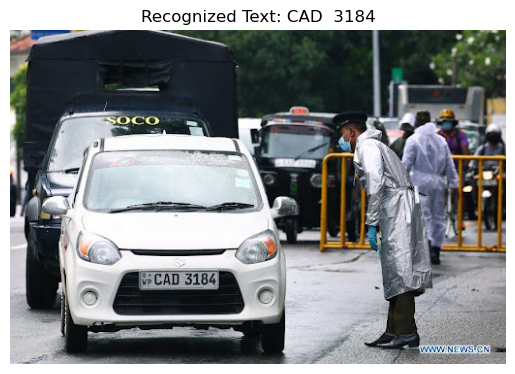

In [24]:
# example usage (with noisy background)
number_plate_recognition("numberplate.jpg")

In such cases, other approaches (e.g. relying on <b>region of interest</b>, ensemble deep learning etc.) may be more effective.